In [1]:
%load_ext rpy2.ipython

from fig_builder import TwinsFiguresData, TwinsFigures
from fig_builder import umap
from plotnine import *
import pandas as pd
import warnings
from random import shuffle


warnings.filterwarnings('ignore')

fig_data = TwinsFiguresData()
figs = TwinsFigures(fig_data)

In [2]:
meta = figs.metadata()
meta

In [24]:
taxa = figs.species()
taxa['flight'] = meta.loc[taxa.index, 'flight']
taxa['kind'] = meta.loc[taxa.index, 'kind']
taxa = taxa.query('kind != "buccal"')
taxa = taxa.dropna()
taxa = taxa.drop(columns='flight')
taxa = taxa.drop(columns='kind')
taxa

,Candidatus Korarchaeum cryptofilum,Candidatus Prometheoarchaeum syntrophicum,Candidatus Mancarchaeum acidiphilum,Acidilobus saccharovorans,Acidilobus sp. 7A,Caldisphaera lagunensis,Aeropyrum camini,Aeropyrum pernix,Desulfurococcus amylolyticus,Desulfurococcus mucosus,...,Wuhan heteroptera virus 3,Wuhan insect virus 19,Wuhan spider virus 2,Wuhan spider virus 6,Xingshan nematode virus 2,narna-like virus 6,uncultured Mediterranean phage,Plasmid pAM77,Plasmid pIP1527,Plasmid pUB110
011515_TW_S,0.000000e+00,1.078329e-06,0.000000e+00,0.000000e+00,0.000000e+00,8.087470e-07,0.000000e+00,1.347912e-07,0.000000e+00,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
012015_HR_S,0.000000e+00,1.321119e-06,1.100933e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.201865e-07,...,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
012016_HR_S,0.000000e+00,4.766935e-07,0.000000e+00,0.000000e+00,0.000000e+00,6.809907e-08,0.000000e+00,3.404953e-08,0.000000e+00,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
012715_TW_S,1.022877e-07,6.137263e-07,4.091509e-07,8.183017e-07,0.000000e+00,1.125165e-06,0.000000e+00,0.000000e+00,5.114386e-07,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,1.022877e-07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
040616_TW_S,7.264019e-07,2.724007e-07,9.080024e-08,7.264019e-07,2.724007e-07,1.362004e-06,0.000000e+00,0.000000e+00,1.816005e-07,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,9.080024e-08,0.0,0.000000e+00,0.0
041015_TW_S,0.000000e+00,6.591399e-07,0.000000e+00,3.954839e-07,1.318280e-07,5.273119e-07,2.636560e-07,0.000000e+00,1.318280e-07,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
050616_HR_S,9.792476e-08,2.937743e-07,9.792476e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.792476e-08,...,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
061416_TW_S,7.528314e-08,1.430380e-06,1.505663e-07,2.258494e-07,7.528314e-08,7.528314e-07,7.528314e-08,0.000000e+00,1.505663e-07,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,7.528314e-08,0.0,0.000000e+00,0.0
073015_HR_S,0.000000e+00,2.324929e-06,0.000000e+00,5.283930e-08,2.113572e-07,3.170358e-07,0.000000e+00,0.000000e+00,2.113572e-07,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
082916_HR_S,1.454402e-07,1.745282e-06,1.454402e-07,0.000000e+00,2.908804e-07,5.817608e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0


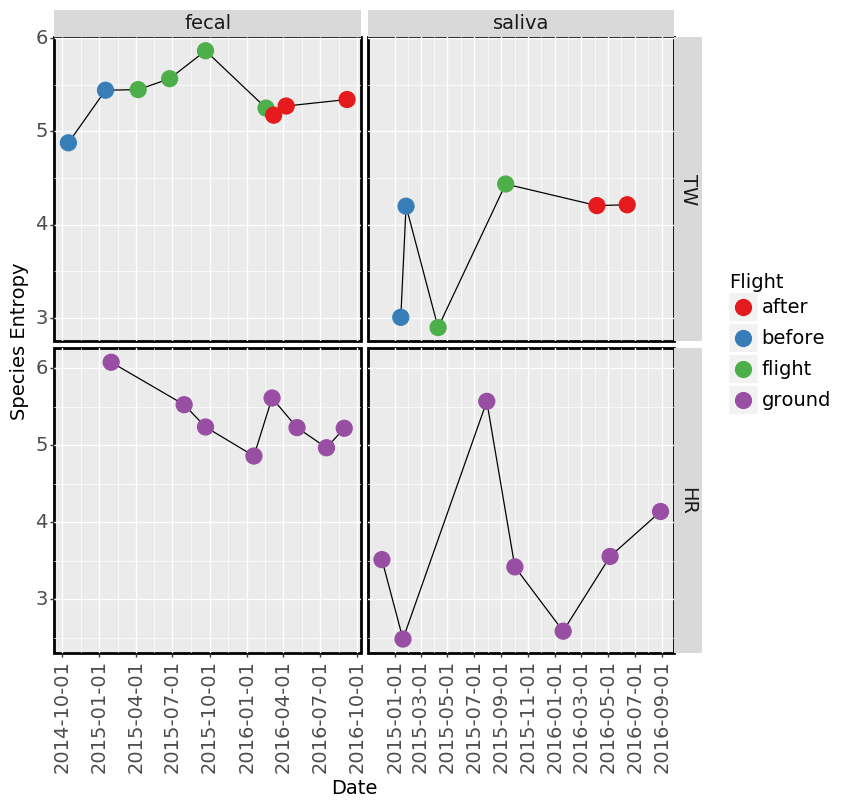

<ggplot: (-9223363255998813780)>

In [36]:
import math

def shannon_entropy(row, rarefy=0):
    """Return the shannon entropy of an iterable.
    Shannon entropy is robust to rarefaction but we keep
    the param for consistency.
    """
    row_sum, H = sum(row), 0
    for val in row:
        val = val / row_sum
        if val == 0:
            continue
        H += val * math.log2(val)
    if H < 0:
        H *= -1
    return H

richness = (taxa > (1 / (1 * 1000 * 1000))).sum(axis=1)
entropy = taxa.apply(shannon_entropy, axis=1)
diversity = pd.DataFrame.from_dict({'richness': richness, 'entropy': entropy}, orient='columns')
diversity['kind'] = meta.loc[diversity.index, 'kind']
diversity['subject'] = meta.loc[diversity.index, 'subject']
diversity['date'] = meta.loc[diversity.index, 'date']
diversity['flight'] = meta.loc[diversity.index, 'flight']

(
    ggplot(diversity, aes(x='date', y='entropy', color='flight')) +
        facet_grid('subject~kind', scales='free') +
        geom_line(color='black') +
        geom_point(size=6) +
        scale_x_date() +
        scale_color_brewer(type='qualitative', palette=6, direction=1) +
        xlab(f'Date') +
        ylab(f'Species Entropy') +
        labs(color='Flight') +
        theme(
            text=element_text(size=14),
            axis_text_x=element_text(angle=90),
            legend_position='right',
            panel_border=element_rect(colour="black", fill='none', size=2),
            figure_size=(8, 8),
        )
)

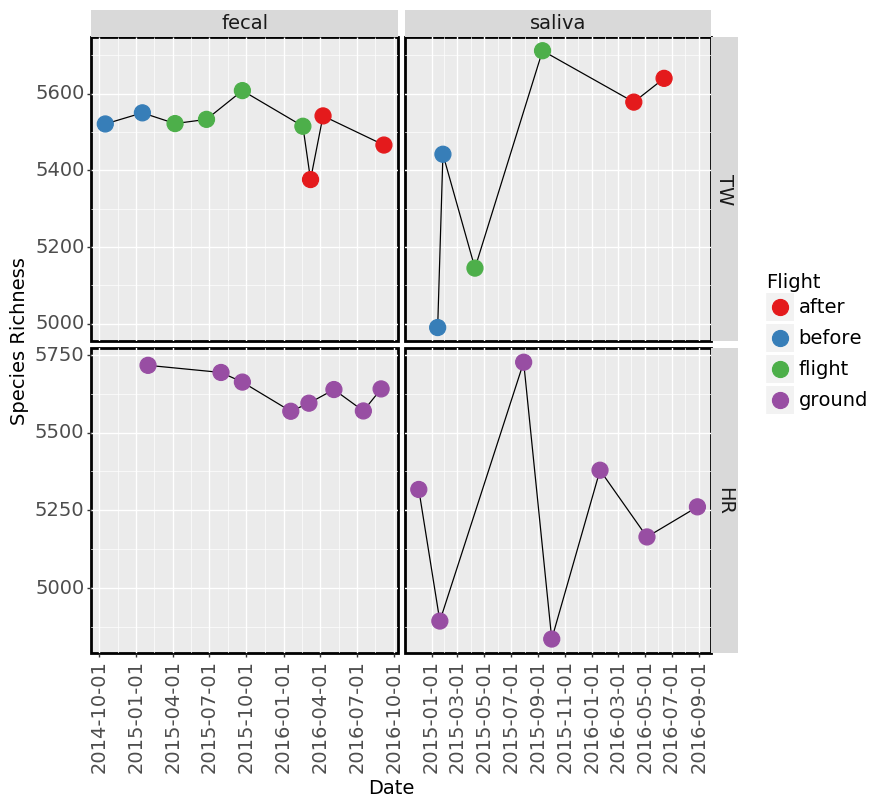

<ggplot: (-9223363255998380277)>

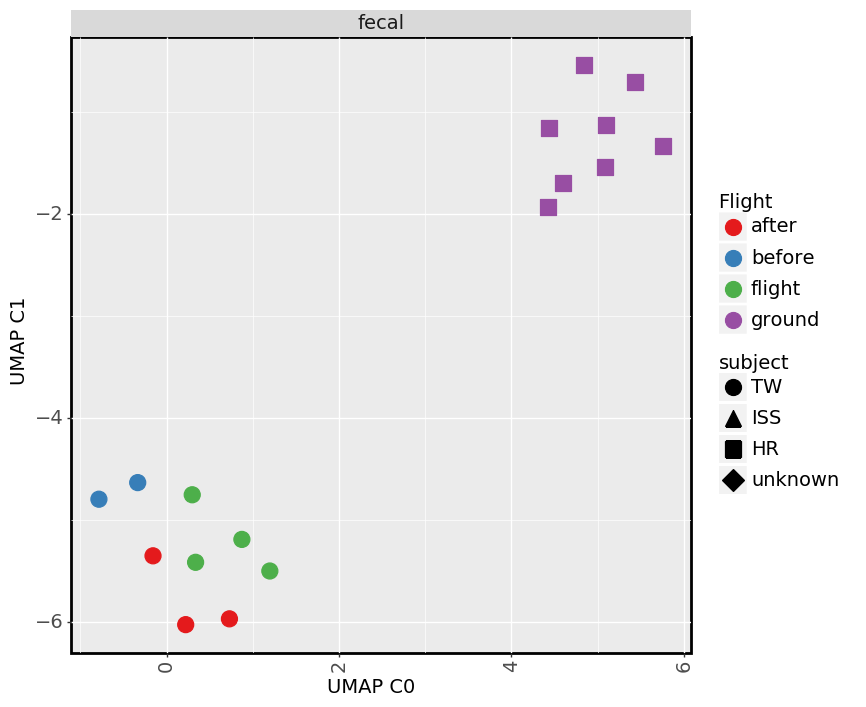

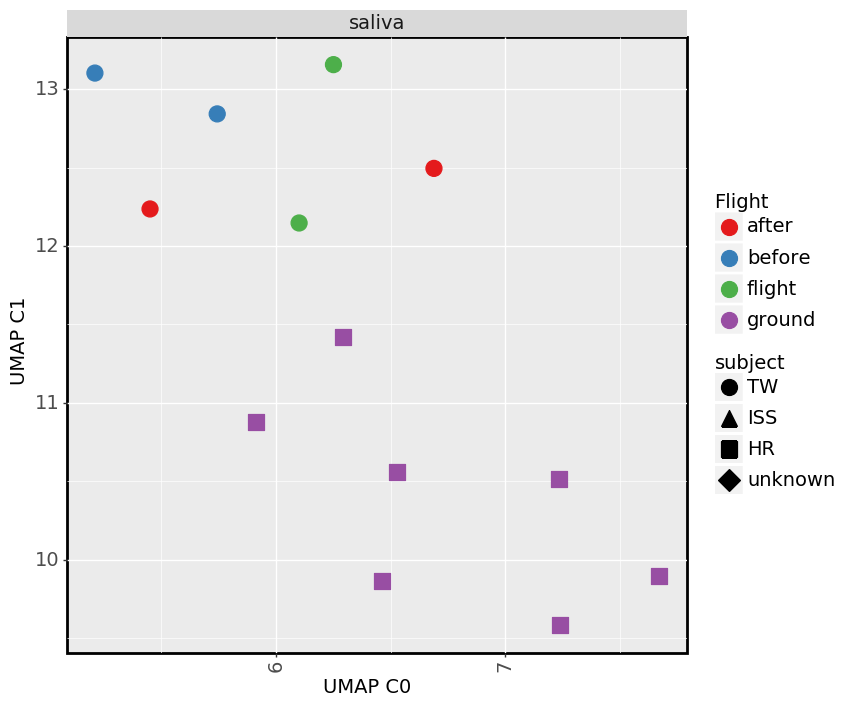

[<ggplot: (8780853475336)>, <ggplot: (8780853482139)>]

In [22]:
taxa['kind'] = meta.loc[taxa.index, 'kind']
utaxa = {
    'fecal': umap(taxa.query('kind == "fecal"').drop(columns=['kind'])),
    'saliva': umap(taxa.query('kind == "saliva"').drop(columns=['kind']))
}
utaxa['fecal']['flight'] = meta.loc[utaxa['fecal'].index, 'flight']
utaxa['fecal']['kind'] = meta.loc[utaxa['fecal'].index, 'kind']
utaxa['fecal']['subject'] = meta.loc[utaxa['fecal'].index, 'subject']
utaxa['saliva']['flight'] = meta.loc[utaxa['saliva'].index, 'flight']
utaxa['saliva']['kind'] = meta.loc[utaxa['saliva'].index, 'kind']
utaxa['saliva']['subject'] = meta.loc[utaxa['saliva'].index, 'subject']


def plotit(title, utaxa):
    return (
        ggplot(utaxa, aes(x='C0', y='C1', color='flight', shape='subject')) +
            facet_grid('.~kind', scales='free') +
            geom_point(size=6) +
            scale_color_brewer(type='qualitative', palette=6, direction=1) +
            xlab(f'UMAP C0') +
            ylab(f'UMAP C1') +
            labs(color='Flight') +
            theme(
                text=element_text(size=14),
                axis_text_x=element_text(angle=90),
                legend_position='right',
                panel_border=element_rect(colour="black", fill='none', size=2),
                figure_size=(8, 8),
            )
    )

[
    plotit('Fecal', utaxa['fecal']),
    plotit('Saliva', utaxa['saliva']),
]

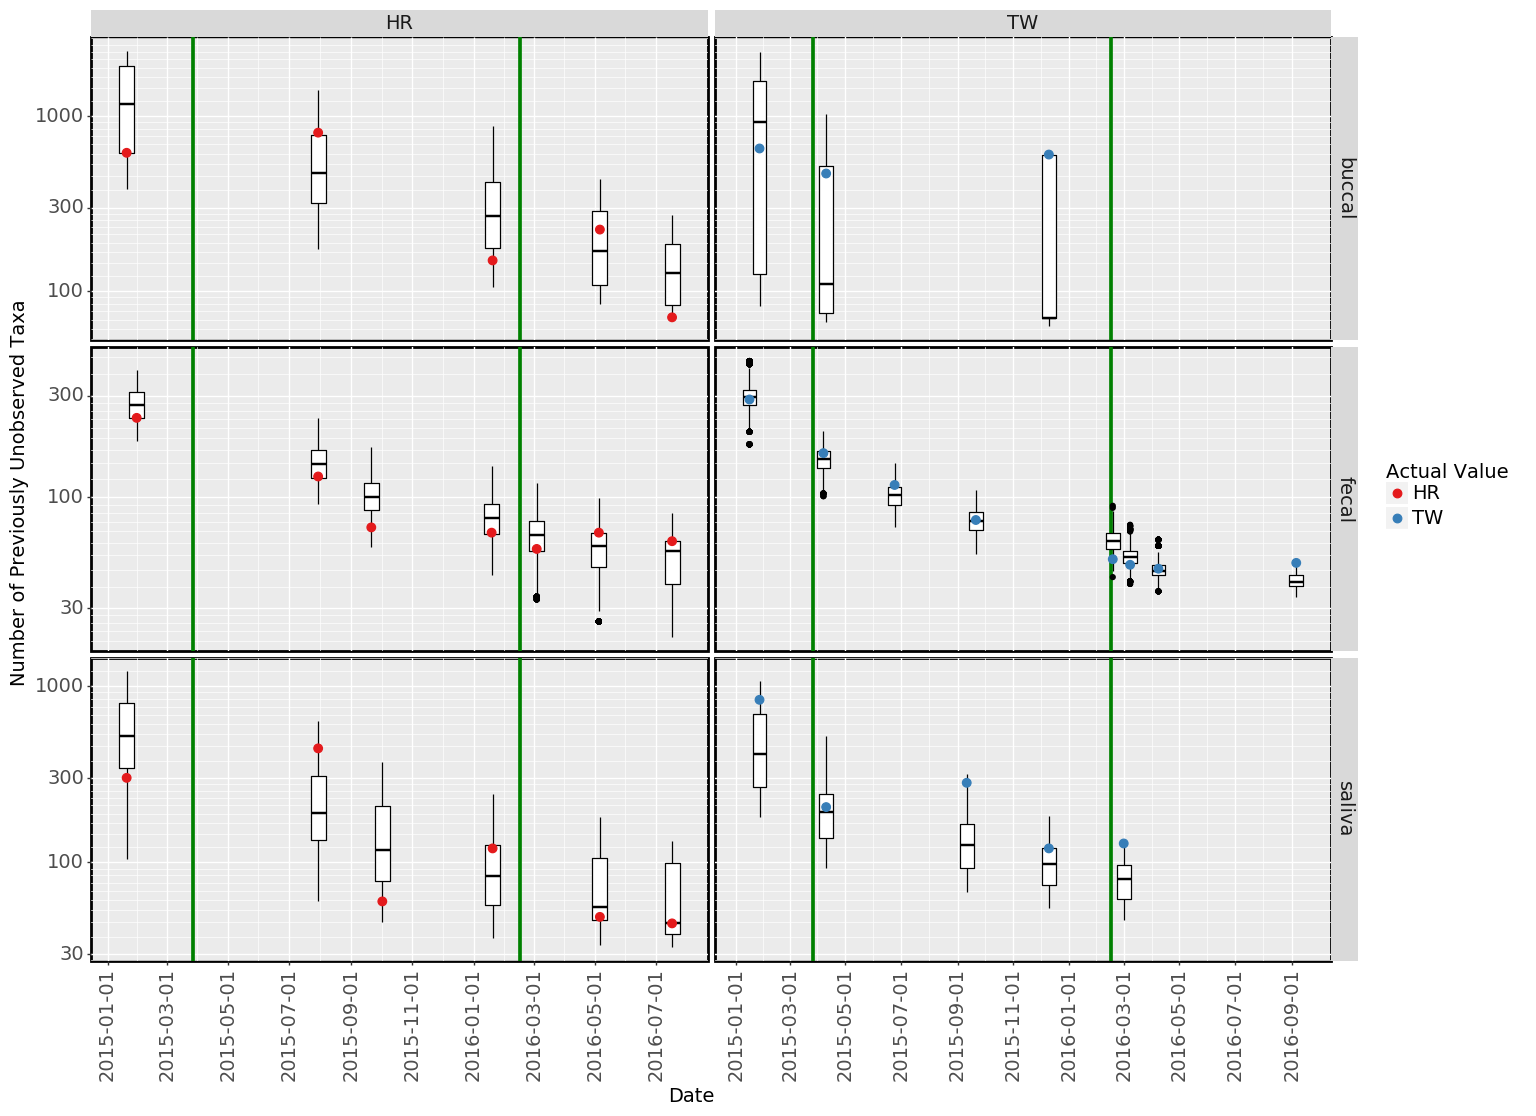

<ggplot: (8751748355199)>

In [178]:
(
    ggplot(new_taxa_tbl, aes(x='order', y='value', color='subject')) +
        geom_vline(xintercept='2015-03-27', color='green', size=1.5) +
        geom_vline(xintercept='2016-02-16', color='green', size=1.5) +
        facet_grid('kind~subject', scales='free') +
        geom_boxplot(width=15, data=new_taxa_tbl.query('variable != "Real Order"'), color='black') +
        geom_point(data=new_taxa_tbl.query('variable == "Real Order"'), size=3) +
        scale_y_log10() +
        scale_x_date() +
        scale_color_brewer(type='qualitative', palette=6, direction=1) +
        xlab(f'Date') +
        ylab(f'Number of Previously Unobserved Taxa') +
        labs(color='Actual Value') +
        theme(
            text=element_text(size=14),
            axis_text_x=element_text(angle=90),
            legend_position='right',
            panel_border=element_rect(colour="black", fill='none', size=2),
            figure_size=(16, 12),
        )
)

In [143]:


def perm_test(subj, kind, new_taxa_tbl):
    tbl = new_taxa_tbl.query('subject == @subj').query('kind ==@kind')
    real = tbl.query('variable == "Real Order"')
    fake = tbl.query('variable != "Real Order"')
    
    inds = [2, 3, 4]
    if kind == 'buccal':
        inds = [2, 3]
    c = real.query('numeric_order in @inds').set_index('numeric_order')
    def compare(sub_tbl):
        t = sub_tbl.query('numeric_order in @inds').set_index('numeric_order')
        bigger = (t['value'] >= c['value']).sum() == len(inds)
        return bigger

    larger = fake.groupby('ovariable').apply(compare)
    return larger.mean()

[
    perm_test('TW', 'fecal', new_taxa_tbl),
    perm_test('TW', 'saliva', new_taxa_tbl),
    perm_test('TW', 'buccal', new_taxa_tbl),
    perm_test('HR', 'fecal', new_taxa_tbl),
    perm_test('HR', 'saliva', new_taxa_tbl),
    perm_test('HR', 'buccal', new_taxa_tbl),
]

[0.033, 0.018, 0.164, 0.541, 0.018, 0.191]

In [145]:
[1 - x for x in [0.033, 0.018, 0.164, 0.541, 0.018, 0.191]]

[0.967, 0.982, 0.836, 0.45899999999999996, 0.982, 0.8089999999999999]

In [141]:
env_taxa = figs.iss.taxa_read_counts()
env_taxa = taxa[set(taxa.columns) & set(env_taxa.columns)]

In [142]:
new_env_taxa_tbls = [
    get_new_taxa_tbl('TW', 'fecal', env_taxa),
    get_new_taxa_tbl('TW', 'buccal', env_taxa),
    get_new_taxa_tbl('TW', 'saliva', env_taxa),
    get_new_taxa_tbl('HR', 'fecal', env_taxa),
    get_new_taxa_tbl('HR', 'buccal', env_taxa),
    get_new_taxa_tbl('HR', 'saliva', env_taxa),
]
new_env_taxa_tbl = pd.concat(new_env_taxa_tbls)
new_env_taxa_tbl

,order,numeric_order,variable,value,ovariable,subject,kind
0,2015-01-16 00:00:00,1,Real Order,231,Real Order,TW,fecal
1,2015-04-07 00:00:00,2,Real Order,99,Real Order,TW,fecal
2,2015-06-24 00:00:00,3,Real Order,77,Real Order,TW,fecal
3,2015-09-21 00:00:00,4,Real Order,46,Real Order,TW,fecal
4,2016-02-18 00:00:00,5,Real Order,22,Real Order,TW,fecal
...,...,...,...,...,...,...,...
6001,2015-07-30 00:00:00,2,permutation,219,permutation_999,HR,saliva
6002,2015-10-02 00:00:00,3,permutation,196,permutation_999,HR,saliva
6003,2016-01-20 00:00:00,4,permutation,30,permutation_999,HR,saliva
6004,2016-05-06 00:00:00,5,permutation,44,permutation_999,HR,saliva


In [144]:
[
    perm_test('TW', 'fecal', new_env_taxa_tbl),
    perm_test('TW', 'saliva', new_env_taxa_tbl),
    perm_test('TW', 'buccal', new_env_taxa_tbl),
    perm_test('HR', 'fecal', new_env_taxa_tbl),
    perm_test('HR', 'saliva', new_env_taxa_tbl),
    perm_test('HR', 'buccal', new_env_taxa_tbl),
]

[0.025, 0.023, 0.161, 0.664, 0.017, 0.189]

In [146]:
[1 - x for x in [0.025, 0.023, 0.161, 0.664, 0.017, 0.189]]

[0.975, 0.977, 0.839, 0.33599999999999997, 0.983, 0.8109999999999999]

In [147]:
new_taxa_tbl

,order,numeric_order,variable,value,ovariable,subject,kind
0,2015-01-16 00:00:00,1,Real Order,288,Real Order,TW,fecal
1,2015-04-07 00:00:00,2,Real Order,161,Real Order,TW,fecal
2,2015-06-24 00:00:00,3,Real Order,114,Real Order,TW,fecal
3,2015-09-21 00:00:00,4,Real Order,78,Real Order,TW,fecal
4,2016-02-18 00:00:00,5,Real Order,51,Real Order,TW,fecal
...,...,...,...,...,...,...,...
6001,2015-07-30 00:00:00,2,permutation,178,permutation_999,HR,saliva
6002,2015-10-02 00:00:00,3,permutation,104,permutation_999,HR,saliva
6003,2016-01-20 00:00:00,4,permutation,57,permutation_999,HR,saliva
6004,2016-05-06 00:00:00,5,permutation,48,permutation_999,HR,saliva


In [167]:
def get_new_taxa_abundance_tbl(subject, kind, taxa):
    tw_real_order = meta.query('subject == @subject').query('kind == @kind')['date'].sort_values().index.to_list()
    tw_real_order = [el for el in tw_real_order if el in taxa.index]
    new_taxa_tbl = new_taxa(tw_real_order, taxa)
    new_taxa_tbl = pd.DataFrame.from_dict(new_taxa_tbl, orient='index')
    new_taxa_tbl = new_taxa_tbl.fillna(0)
    return new_taxa_tbl
    

def new_taxa(order, taxa):
    out = {}
    current_taxa = set()
    for i, sample_name in enumerate(order):
        try:
            sample_taxa = taxa.loc[sample_name]
        except KeyError:
            continue
        sample_taxa = set(sample_taxa[sample_taxa > 0].index.to_list())
        new_taxa = sample_taxa - current_taxa
        current_taxa |= sample_taxa
        out[i] = {x: 1 for x in new_taxa}
    return out


new_taxa_abunds = {
    ('TW', 'fecal'):    get_new_taxa_abundance_tbl('TW', 'fecal', taxa),
    ('TW', 'buccal'):    get_new_taxa_abundance_tbl('TW', 'buccal', taxa),
    ('TW', 'saliva'):    get_new_taxa_abundance_tbl('TW', 'saliva', taxa),
    ('HR', 'fecal'):    get_new_taxa_abundance_tbl('HR', 'fecal', taxa),
    ('HR', 'buccal'):    get_new_taxa_abundance_tbl('HR', 'buccal', taxa),
    ('HR', 'saliva'):    get_new_taxa_abundance_tbl('HR', 'saliva', taxa),
}

new_taxa_abunds[('TW', 'fecal')]

,d__Bacteria|p__Proteobacteria|c__Betaproteobacteria|o__Burkholderiales|f__Alcaligenaceae|g__Pelistega,d__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Apibacter|s__Apibacter sp. B2966,d__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|s__Bacteroidales bacterium CF,d__Bacteria|p__Cyanobacteria|o__Chroococcales|f__Aphanothecaceae|g__Candidatus Atelocyanobacterium|s__Candidatus Atelocyanobacterium thalassa,d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas sp. GT,d__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Frankiales|f__Frankiaceae|g__Frankia|s__Candidatus Frankia datiscae,d__Bacteria|p__Tenericutes|c__Mollicutes|o__Acholeplasmatales|f__Acholeplasmataceae|g__Acholeplasma|s__Acholeplasma laidlawii,d__Bacteria|p__Proteobacteria|c__Betaproteobacteria|o__Neisseriales|f__Neisseriaceae|g__Neisseria|s__Neisseria elongata,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Myoviridae|g__Salmondvirus|s__Dickeya virus JA29,d__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus terrae,...,d__Archaea|p__Crenarchaeota|c__Thermoprotei|o__Desulfurococcales|f__Desulfurococcaceae|g__Thermosphaera,d__Viruses|k__Orthornavirae|p__Pisuviricota|c__Pisoniviricetes|o__Picornavirales|f__Picornaviridae|g__Megrivirus,d__Viruses|k__Bamfordvirae|p__Nucleocytoviricota|c__Megaviricetes|o__Algavirales|f__Phycodnaviridae|g__Prasinovirus,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Siphoviridae|g__Kagunavirus|s__Escherichia virus K1ind1,d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Salmonella|s__Salmonella sp. SCFS4,d__Eukaryota|c__Cryptophyceae|o__Cryptomonadales|f__Cryptomonadaceae|g__Cryptomonas|s__Cryptomonas paramecium,d__Bacteria|p__Proteobacteria|c__Epsilonproteobacteria|o__Campylobacterales|f__Helicobacteraceae|g__Helicobacter|s__Helicobacter acinonychis,d__Viruses|p__Peploviricota|c__Herviviricetes|o__Herpesvirales|f__Herpesviridae|g__Mardivirus,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Siphoviridae|g__Skunavirus|s__Lactococcus virus bIL170,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Myoviridae|g__Radnorvirus|s__Arthrobacter virus ArV1
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [169]:

env_total_prop_tbl = {}
for i, t in new_taxa_abunds.items():
    overall = t.sum(axis=1)
    env = t[set(env_taxa.columns) & set(t.columns)].sum(axis=1)
    env_total_prop_tbl[i] = env / overall
    
env_total_prop_tbl = pd.DataFrame.from_dict(env_total_prop_tbl, orient='index')
env_total_prop_tbl *= 100
env_total_prop_tbl

0          1          2          3          4          5  \
TW fecal   97.900955  80.208333  61.490683  67.543860  58.974359  43.137255   
   buccal  98.371777  93.721286  92.553191  82.255390        NaN        NaN   
   saliva  98.239389  85.799523  63.592233  69.611307  52.500000  57.812500   
HR fecal   97.641624  59.322034  51.200000  52.777778  50.000000  56.140351   
   buccal  98.802783  94.489465  92.164179  88.000000  88.444444  85.915493   
   saliva  97.772054  82.450331  77.027027  60.000000  55.000000  61.224490   

                   6          7          8  
TW fecal   52.083333  52.173913  57.142857  
   buccal        NaN        NaN        NaN  
   saliva        NaN        NaN        NaN  
HR fecal   50.000000  43.548387        NaN  
   buccal        NaN        NaN        NaN  
   saliva  48.888889        NaN        NaN

In [172]:
env_total_prop_tbl[[2, 3, 4]].mean(axis=1)

TW  fecal     62.669634
    buccal    87.404291
    saliva    61.901180
HR  fecal     51.325926
    buccal    89.536208
    saliva    64.009009
dtype: float64

In [2]:
meta = figs.metadata()
# meta['kind'] = meta['kind'].map(lambda x: 'oral' if x in ['buccal', 'saliva'] else x)
twins_taxa = figs.twins.taxa_read_counts()
iss_taxa = figs.iss.taxa_read_counts()
meta

,date,pma_treated,kind,subject,flight,during_flight,time_label
011515_TW_B,2015-01-15,False,buccal,TW,before,before,before
011515_TW_S,2015-01-15,False,saliva,TW,before,before,before
012015_HR_B,2015-01-20,False,buccal,HR,ground,before,before
012015_HR_S,2015-01-20,False,saliva,HR,ground,before,before
012016_HR_B,2016-01-20,False,buccal,HR,ground,flight,flight
...,...,...,...,...,...,...,...
IIIF3SW,2016-05-06,False,Surface,ISS,NaN,NaN,unknown
IIIF8SW_P,2016-05-06,True,Surface,ISS,NaN,NaN,unknown
IIIF5SW_P,2016-05-06,True,Surface,ISS,NaN,NaN,unknown
IIIF3SW_P,2016-05-06,True,Surface,ISS,NaN,NaN,unknown


In [65]:
PRE_READ_CUTOFF = 1
READ_CUTOFF = 10
MIN_N_SAMPLES = 2

twins_env_taxa = twins_taxa[set(twins_taxa.columns) & set(iss_taxa.columns)]
twins_env_taxa = twins_env_taxa.fillna(0)
twins_env_taxa['flight'] = meta.loc[twins_env_taxa.index, 'flight']

twins_env_taxa['kind'] = meta.loc[twins_env_taxa.index, 'kind']
twins_env_taxa = twins_env_taxa.query('kind != "buccal"')
twins_env_taxa = twins_env_taxa.dropna()
twins_env_taxa = twins_env_taxa.drop(columns=['kind'])

tw_env_taxa = twins_env_taxa.query('flight != "ground"')
preflight_taxa = (tw_env_taxa.query('flight == "before"').drop(columns=['flight']) >= PRE_READ_CUTOFF).sum()
preflight_taxa = preflight_taxa[preflight_taxa > 0].index.to_list()
flight_taxa = set(tw_env_taxa.columns) - set(preflight_taxa)
print(len(flight_taxa))

tw_flight_taxa = tw_env_taxa[flight_taxa]
tw_flight_taxa = tw_flight_taxa.drop(columns=['flight'])
tw_flight_taxa = (tw_flight_taxa >= READ_CUTOFF).sum()
tw_flight_taxa = tw_flight_taxa[tw_flight_taxa >= MIN_N_SAMPLES]
print(tw_flight_taxa.shape)
# tw_flight_taxa = tw_flight_taxa[[('s__' in el) for el in tw_flight_taxa.index]]

print(tw_flight_taxa.shape)
tw_flight_taxa

522
(5,)
(5,)


d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Siphoviridae|s__Streptococcus phage phiARI0004                    2
d__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rickettsiales|f__Rickettsiaceae|g__Rickettsia|s__Rickettsia australis    3
d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Myoviridae|s__Xanthomonas phage vB_XveM_DIBBI                     2
d__Viruses|k__Bamfordvirae|p__Nucleocytoviricota|c__Pokkesviricetes|o__Chitovirales|f__Poxviridae|g__Orthopoxvirus               2
d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Myoviridae|g__Emdodecavirus                                       2
dtype: int64

In [66]:
tw_flight_taxa = tw_env_taxa[tw_flight_taxa.index].fillna(0)
tw_flight_taxa.columns = tw_flight_taxa.columns.map(lambda x: x.split('__')[-1])
tw_flight_taxa['flight'] = meta.loc[tw_flight_taxa.index, 'flight']
tw_flight_taxa['date'] = meta.loc[tw_flight_taxa.index, 'date']
tw_flight_taxa['kind'] = meta.loc[tw_flight_taxa.index, 'kind']
tw_flight_taxa = tw_flight_taxa.rename(columns={
    'Streptococcus phage phiARI0004': 'Streptococcus phage',
    'Xanthomonas phage vB_XveM_DIBBI': 'Xanthomonas phage'
})
tw_flight_taxa = tw_flight_taxa.melt(id_vars=['flight', 'date', 'kind'])
tw_flight_taxa = tw_flight_taxa.dropna()
tw_flight_taxa = tw_flight_taxa.query('kind != "buccal"')
tw_flight_taxa

,flight,date,kind,variable,value
0,before,2015-01-15,saliva,Streptococcus phage,0.0
1,before,2015-01-27,saliva,Streptococcus phage,0.0
2,after,2016-04-06,saliva,Streptococcus phage,45.0
3,flight,2015-04-10,saliva,Streptococcus phage,11.0
4,after,2016-06-14,saliva,Streptococcus phage,2.0
...,...,...,...,...,...
70,flight,2015-06-24,fecal,Emdodecavirus,0.0
71,flight,2015-09-21,fecal,Emdodecavirus,0.0
72,after,2016-03-08,fecal,Emdodecavirus,0.0
73,after,2016-04-08,fecal,Emdodecavirus,0.0


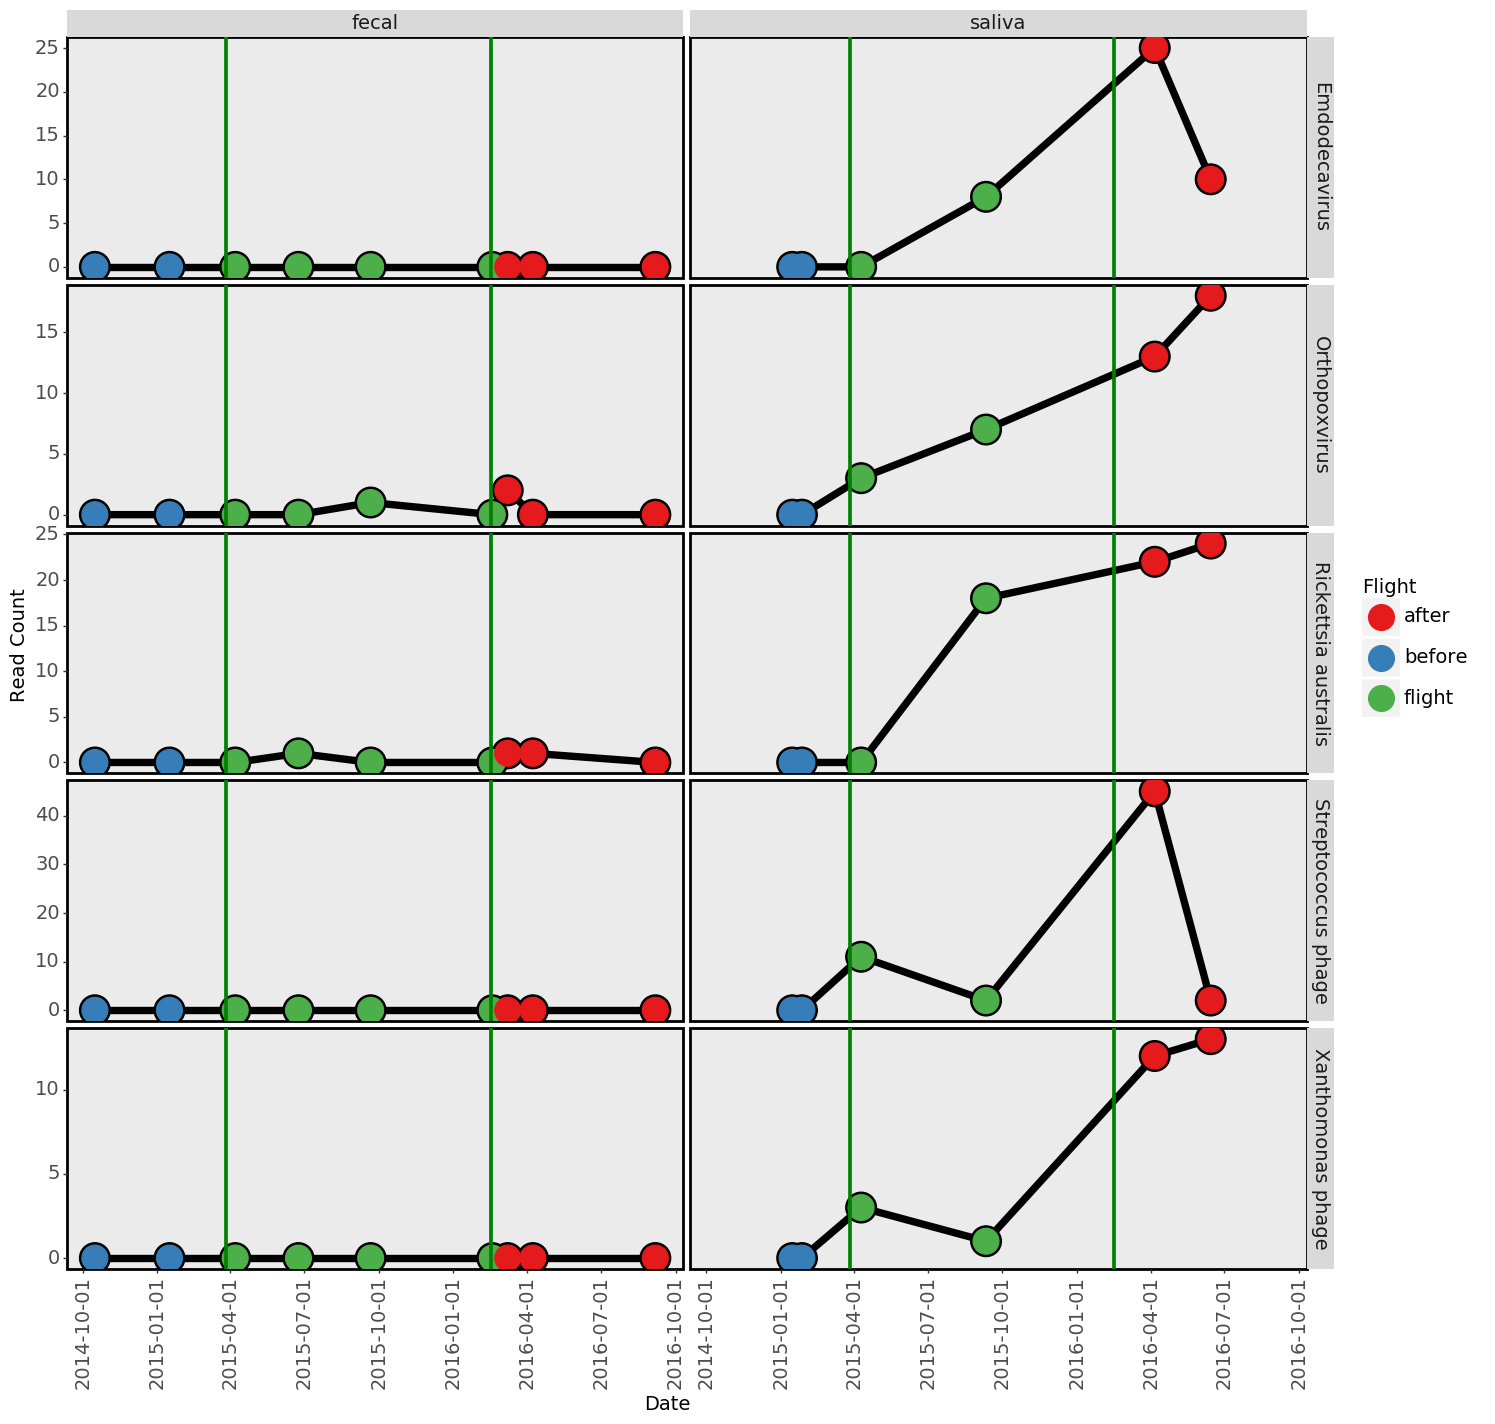

<ggplot: (-9223363279031238277)>

In [70]:

(
    ggplot(tw_flight_taxa, aes(x='date', y='value', color='flight')) +
        geom_line(color='black', size=3) +
        geom_point(size=12, colour="black") +
        geom_point(size=10) +
        facet_grid('variable~kind', scales='free_y') +
        #theme_minimal() +
        scale_x_date() +
        scale_color_brewer(type='qualitative', palette=6, direction=1) +
        #theme_minimal() +
        xlab(f'Date') +
        ylab(f'Read Count') +
        labs(color='Flight', shape='Kind') +
        geom_vline(xintercept='2015-03-27', color='green', size=1.5) +
        geom_vline(xintercept='2016-02-16', color='green', size=1.5) +
        theme(
            text=element_text(size=14),
            panel_grid_major=element_blank(),
            panel_grid_minor=element_blank(),
            axis_text_x=element_text(angle=90),
            legend_position='right',
            panel_border=element_rect(colour="black", fill='none', size=2),
            figure_size=(16, 16),
        )
)    
